## Results with 1% error rate
| Amount of wrong answers | where | result /100 | result/134|
| --- | --- | --- |--- |
| 4/20 | 1-4 | 5/100, with random branching (40): 16/100 |8/134|
| 4/20 | 17-20 | 80/100 | 108/134|
| 4/20 | randomly | 43/100 ||
| 3/20 | 1-3 | 24/100 ||
| 3/20 | 18-20 | 94/100 | 123/134||
| --- | --- | --- ||
| 5% Wrong Answer Rate| any | 106/130 ||

# Curious Results
| Amount of wrong answers | where | result /100 | error rate|
| --- | --- | --- |--- |
| 4/20 | 1-4 | 34/134, if we match error rate|20%|
| 4/20 | 17-20 | 111/134, if we match error rate|20%|
| 4/20 | random | 61/134|10%|
|3/20|1-3|70/134|20% ER
|3/20|1-3|49/134|10% ER
|3/20|18-20|122/134|20% ER
|3/20|18-20|121/134|10% ER
|3/20|random|105/134|20% ER

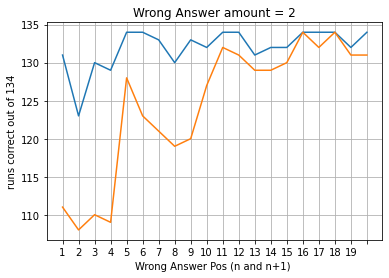

In [12]:

resultsOneWrong = [131, 123, 130, 129, 134, 134, 133, 130, 133, 132, 134, 134, 131, 132, 132, 134, 134, 134, 132, 134]
resultsTwoWrong = [111, 108, 110,109,128,123,121,119,120,127,132,131,129,129,130,134,132,134,131,131]
x = range(0,20)
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x, resultsOneWrong)
ax.plot(x, resultsTwoWrong)

ax.set(xlabel='Wrong Answer Pos (n and n+1) ', ylabel='runs correct out of 134',
       title='Wrong Answer amount = 2')
ax.grid()
labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.xticks(x, labels)#, rotation=45)
#plt.savefig('nIsTwo.png')
plt.show()


In [21]:
#Wrong answers in position x, results in this many wins out of 134

for i in range(len(lists)):
    print(performances[i], lists[i], "\n")

131 [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True] 

123 [True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True] 

130 [True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True] 

129 [True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True] 

134 [True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True] 

134 [True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True] 

133 [True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True] 

130 [True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, Tr

In [16]:
#First 4 Questions answered wrong each time (5/100) /Instead with random branching: (16/100)


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
False
0.01
Question: 2
Does the thing you are looking for have the attribute: nationality United_States?
True
0.0001
Question: 3
Does the thing you are looking for have the attribute: memberOf Democratic_Party_(United_States)?
True
1.0000000000000002e-06
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Politician?
True
1.0000000000000002e-08
Question: 5
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
9.900000000000001e-09
Question: 6
Does the thing you are looking for have the attribute: alumniOf Columbia_University?
False
9.801000000000001e-09
Question: 7
Does the thing you are looking for have the attribute: homeLocation San_Francisco?
False
9.702990000000001e-09
Question: 8
Does the thing you are looking for have the attribute: hasOccupation Statesman?
False
9.60596

In [34]:
#4 wrong per question, first 100 entities
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 4
totalgames = 100
Entrop_over_game = []
list_losses=[]
list_wins=[]

possibleObj, possiblePred, count = findSplits()
loadAllAttributes(possibleObj,possiblePred)
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
        list_wins.append(answerPattern)
    else:
        list_losses.append(answerPattern)
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(1)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: nationality United_Kingdom?
True
0.96059601
Question: 5
Does the thing you are looking for have the attribute: award Order_of_the_British_Empire?
True
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Stage_actor?
wrong answer incoming
True
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: award Academy_Award_for_Best_Supporting_Actress?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: award Theatre_World_Award?
False
0.009320653

In [33]:
#without printing results # 3 wrong per question
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 3
totalgames = 100
Entrop_over_game = []
list_losses=[]
list_wins=[]

possibleObj, possiblePred, count = findSplits()
loadAllAttributes(possibleObj,possiblePred)
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
        list_wins.append(answerPattern)
    else:
        list_losses.append(answerPattern)
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(20)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: nationality United_Kingdom?
True
0.96059601
Question: 5
Does the thing you are looking for have the attribute: award Order_of_the_British_Empire?
True
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Stage_actor?
wrong answer incoming
True
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: award Academy_Award_for_Best_Supporting_Actress?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: award Theatre_World_Award?
False
0.009320653

In [64]:
#4 Questions Wrong for each entitiy
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 4
totalgames = 100
Entrop_over_game = []

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(20)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Songwriter?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
wrong answer incoming
True
0.009801
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Actor?
wrong answer incoming
False
9.801e-05
Question: 5
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
9.70299e-05
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Dancer?
wrong answer incoming
True
9.70299e-07
Question: 7
Does the thing you are looking for have the attribute: award Nickelodeon_Kids'_Choice_Awards?
False
9.6059601e-07
Question: 8
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Video_

In [14]:
#10 runs, only david bowie, 20% wrong
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
totalgames = 10

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()
while gamesplayed < totalgames:
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']

    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    
    subject = allSubjects(qres, 0)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestion(possibleObj, possiblePred, indexSplit,subject, Distribution)
        i+=1

    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():

        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    time.sleep(5)
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.99
Question: 2
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: hasOccupation Politician?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Poet?
False
0.96059601
Question: 5
Does the thing you are looking for have the attribute: hasOccupation Film_director?
False
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: knowsLanguage English_language?
True
0.9414801494009999
Question: 7
Does the thing you are looking for have the attribute: knowsLanguage German_language?
False
haha fooled!
0.009414801494009998
Question: 8
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Best_Pop_Video?
False


In [12]:
#RESULTS 5% Error Rate, All entities once
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
totalgames = 130

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()
while gamesplayed < totalgames:
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']

    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestion(possibleObj, possiblePred, indexSplit,subject, Distribution)
        i+=1

    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():

        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    time.sleep(60)
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Businessperson?
False
haha fooled!
0.0099
Question: 3
Does the thing you are looking for have the attribute: homeLocation New_York_City?
False
0.009801
Question: 4
Does the thing you are looking for have the attribute: memberOf Democratic_Party_(United_States)?
False
0.00970299
Question: 5
Does the thing you are looking for have the attribute: award Grammy_Award_for_Best_Rap%2FSung_Performance?
False
0.0096059601
Question: 6
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Best_Female_Video?
False
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: hasOccupation Screenwriter?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: knowsLanguage French_language